In [1]:
import cv2
import numpy as np
import pandas as pd
from utils.rboxs_utils import poly_filter, poly2rbox, rbox2poly
import glob

In [2]:
# labels = np.loadtxt('./debug/000002.txt')
label_files = sorted(glob.glob('/home/curl/CUHK/Projects/oriented_object_detection/yolov5_obb_topleft/dataset/dataset_inhouse_phantom/train/labelTxt/*.txt'))

In [3]:
label_files

['/home/curl/CUHK/Projects/oriented_object_detection/yolov5_obb_topleft/dataset/dataset_inhouse_phantom/train/labelTxt/000001.txt',
 '/home/curl/CUHK/Projects/oriented_object_detection/yolov5_obb_topleft/dataset/dataset_inhouse_phantom/train/labelTxt/000002.txt',
 '/home/curl/CUHK/Projects/oriented_object_detection/yolov5_obb_topleft/dataset/dataset_inhouse_phantom/train/labelTxt/000004.txt',
 '/home/curl/CUHK/Projects/oriented_object_detection/yolov5_obb_topleft/dataset/dataset_inhouse_phantom/train/labelTxt/000005.txt',
 '/home/curl/CUHK/Projects/oriented_object_detection/yolov5_obb_topleft/dataset/dataset_inhouse_phantom/train/labelTxt/000006.txt',
 '/home/curl/CUHK/Projects/oriented_object_detection/yolov5_obb_topleft/dataset/dataset_inhouse_phantom/train/labelTxt/000007.txt',
 '/home/curl/CUHK/Projects/oriented_object_detection/yolov5_obb_topleft/dataset/dataset_inhouse_phantom/train/labelTxt/000008.txt',
 '/home/curl/CUHK/Projects/oriented_object_detection/yolov5_obb_topleft/data

In [4]:
txt_path = '/home/curl/CUHK/Projects/oriented_object_detection/yolov5_obb_topleft/dataset/dataset_inhouse_phantom/train/labelTxt/'
img_path = txt_path.replace('labelTxt', 'images')
ex_select_files = ['000050', '001081', '001100', '000982', '000845', '000728', '000689']
in_select_files = ['160505', '200206', '220506', '221303', '230704', '240705', '242405', '291006', '340106', '1030210', '7030203']

In [5]:
txt_file = txt_path + ex_select_files[1] + '.txt'
labels = pd.read_table(txt_file, header=None, sep=' ')
labels

,0,1,2,3,4,5,6,7,8,9
0,1384,113,1399,239,1167,264,1153,139,tool3m,0
1,890,0,1179,267,0,476,0,156,tool3s,0
2,1190,364,1270,236,1692,502,1611,629,tool1m,0
3,1599,618,1687,476,1919,620,1918,816,tool1s,0
4,1110,639,1295,626,1318,962,1133,975,tool2m,0
5,1131,973,1325,953,1338,1079,1141,1080,tool2s,0


In [6]:
labels=labels.iloc[:, :8].values

In [7]:
rboxs = poly2rbox(polys=labels[:, :8], use_pi=True)
rbox2poly(rboxs)
# -4.80174902e-01 * 180/np.pi

array([[ 1.38487701e+03,  1.12901827e+02,  1.39899999e+03,
         2.39000056e+02,  1.16710883e+03,  2.64971830e+02,
         1.15298585e+03,  1.38873601e+02],
       [ 1.12400228e+03, -4.32505042e+01,  1.17899999e+03,
         2.67000100e+02, -8.07291597e-05,  4.75999894e+02,
        -5.49977975e+01,  1.65749289e+02],
       [ 1.69200007e+03,  5.02000048e+02,  1.61151166e+03,
         6.29692193e+02,  1.18951165e+03,  3.63692213e+02,
         1.27000005e+03,  2.36000067e+02],
       [ 2.00609968e+03,  6.74061713e+02,  1.91800013e+03,
         8.15999911e+02,  1.59890056e+03,  6.17938165e+02,
         1.68700011e+03,  4.75999967e+02],
       [ 1.31802297e+03,  9.62334794e+02,  1.13300005e+03,
         9.75000112e+02,  1.10997703e+03,  6.38665328e+02,
         1.29499995e+03,  6.26000010e+02],
       [ 1.32501035e+03,  9.52998974e+02,  1.33800016e+03,
         1.07900002e+03,  1.14296987e+03,  1.09910625e+03,
         1.12998007e+03,  9.73105206e+02]])

In [8]:
poly2rbox(polys=labels[:, :8], use_pi=False)

array([[1275.99291992,  188.93682861,  233.34104919,  126.88665009,
          96.39048767],
       [ 562.00109863,  216.37469482, 1197.38134766,  315.08758545,
         100.05232239],
       [1440.75585938,  432.84613037,  498.83865356,  150.94259644,
          57.7754631 ],
       [1802.50012207,  645.99993896,  375.57022095,  167.05682373,
          58.17255402],
       [1214.        ,  800.50006104,  337.12185669,  185.4559021 ,
           3.91592407],
       [1233.9901123 , 1026.0526123 ,  196.06394958,  126.66885376,
          95.88599396]])

In [9]:
import matplotlib.pyplot as plt

In [10]:
# img = np.zeros((1080,1920,3), dtype=np.uint8)
img = cv2.imread(img_path + ex_select_files[1] + '.jpg')

In [11]:
labels = labels.astype(int)

In [12]:
# img = cv2.circle(img, center=(labels[1,0], labels[1,1]), radius=10, thickness=8, color=(255,255,0))

In [13]:
# black_img = cv2.circle(black_img, center=(100, 100), radius=10, thickness=8, color=(255,255,0))

In [14]:
# (int(labels[1,1]), int(labels[1,0]))

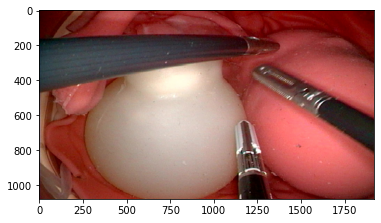

In [15]:
plt.imshow(img[:,:,::-1])

In [16]:
# np.max(black_img), black_img.shape

In [17]:
ind = 3
box = labels[ind,:]

In [18]:
img = cv2.circle(img, center=(box[0], box[1]), radius=5, thickness=4, color=(255,0,0))
img = cv2.line(img, (box[0], box[1]), (box[2], box[3]), (255,255,255), 2)
img = cv2.line(img, (box[2], box[3]), (box[4], box[5]), (255,255,255), 2)
img = cv2.line(img, (box[4], box[5]), (box[6], box[7]), (255,255,255), 2)
img = cv2.line(img, (box[6], box[7]), (box[0], box[1]), (255,255,255), 2)

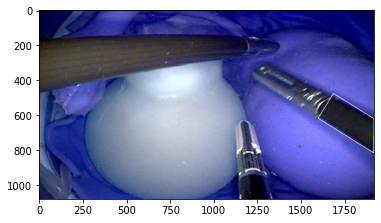

In [19]:
plt.imshow(img)

In [20]:
rboxs = poly2rbox(polys=labels[:, :8], use_pi=True)
rpolys = rbox2poly(rboxs)
rpolys = rpolys.astype(int)

In [21]:
labels[:, :8], rboxs, rpolys

(array([[1384,  113, 1399,  239, 1167,  264, 1153,  139],
        [ 890,    0, 1179,  267,    0,  476,    0,  156],
        [1190,  364, 1270,  236, 1692,  502, 1611,  629],
        [1599,  618, 1687,  476, 1919,  620, 1918,  816],
        [1110,  639, 1295,  626, 1318,  962, 1133,  975],
        [1131,  973, 1325,  953, 1338, 1079, 1141, 1080]]),
 array([[ 1.27599292e+03,  1.88936829e+02,  2.33341049e+02,
          1.26886650e+02,  1.11535027e-01],
        [ 5.62001099e+02,  2.16374695e+02,  1.19738135e+03,
          3.15087585e+02,  1.75446087e-01],
        [ 1.44075586e+03,  4.32846130e+02,  4.98838654e+02,
          1.50942596e+02, -5.62424152e-01],
        [ 1.80250012e+03,  6.45999939e+02,  3.75570221e+02,
          1.67056824e+02, -5.55493609e-01],
        [ 1.21400000e+03,  8.00500061e+02,  3.37121857e+02,
          1.85455902e+02, -1.50245025e+00],
        [ 1.23399011e+03,  1.02605261e+03,  1.96063950e+02,
          1.26668854e+02,  1.02729953e-01]]),
 array([[1384,  112, 139

In [22]:
box = rpolys[ind,:]
img = cv2.circle(img, center=(box[0], box[1]), radius=20, thickness=4, color=(255,0,255))
img = cv2.line(img, (box[0], box[1]), (box[2], box[3]), (255,0,255), 2)
img = cv2.line(img, (box[2], box[3]), (box[4], box[5]), (255,0,255), 2)
img = cv2.line(img, (box[4], box[5]), (box[6], box[7]), (255,0,255), 2)
img = cv2.line(img, (box[6], box[7]), (box[0], box[1]), (255,0,255), 2)

-31.827439362374594


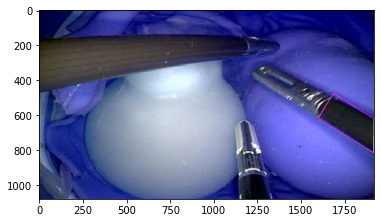

In [23]:
plt.imshow(img)
print(rboxs[ind, -1]*180/np.pi)

In [24]:
# determine the order of the first point
GT_point = labels[ind, :4]
GT_point, box.reshape((-1,2))

(array([1599,  618, 1687,  476]),
 array([[2006,  674],
        [1918,  815],
        [1598,  617],
        [1687,  475]]))

In [25]:
box_array = box.reshape((-1,2))
dist = [np.linalg.norm(box_array[index%4, :] - labels[ind, :2]) + np.linalg.norm(box_array[(index+1)%4, :] - labels[ind, 2:4]) for index in range(4)]
topleft_index = np.argmin(dist)
print(topleft_index)

2


In [26]:
# use simple rules to determine the first point from GT information
rboxs[ind, -1]
# determine the real first point is in which point
order = topleft_index + 1 #

if rboxs[ind, -1] < 0:
    # determine the direction according to the point order
    if order == 1:
        label = 0
    if order == 2:
        label = 1
    if order == 3:
        label = 2
    if order == 4:
        label = 3
if rboxs[ind, -1] >= 0:
    # determine the direction according to the point order
    if order == 2:
        label = 0
    if order == 3:
        label = 1
    if order == 4:
        label = 2
    if order == 1:
        label = 3

print('the corresponding label is: ', label)

the corresponding label is:  2


In [27]:
import matplotlib

In [28]:
# matplotlib.colors.TABLEAU_COLORS.values()

In [29]:
def hex2rgb(h):  # rgb order (PIL)
    return tuple(int(h[1 + i:1 + i + 2], 16) for i in (0, 2, 4))

In [30]:
palette, tools_name.index('tool1m'), ind, labels_.iloc[ind, -2]

NameError: name 'palette' is not defined

theta:  13.821072564060021
label:  3
theta:  12.067105643806306
label:  3
theta:  -20.224855030008406
label:  2
theta:  -15.59766826378565
label:  2


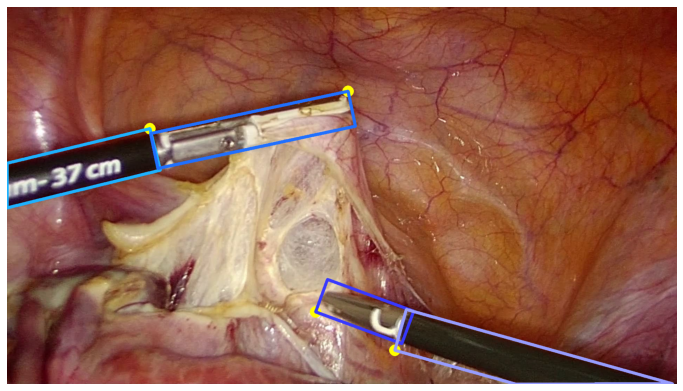

In [31]:
# merged
# labels = np.loadtxt('./debug/000005.txt')
# hex = matplotlib.colors.TABLEAU_COLORS.values()
tools_name = ['tool1m', 'tool1s', 'tool2m', 'tool2s', 'tool3m', 'tool3s', 'tool4m', 'tool4s', 'tool5m', 'tool5s', 'tool6m', 'tool6s', 'tool7m', 'tool7s']
hex = ('FF3838', 'FF9D97', 'FF701F', 'FFB21D', 'CFD231', '48F90A', '92CC17', '3DDB86', '1A9334', '00D4BB',
       '2C99A8', '00C2FF', '344593', '6473FF', '0018EC', '8438FF', '520085', 'CB38FF', 'FF95C8', 'FF37C7')
palette = [hex2rgb('#' + c) for c in hex]
n = len(palette)

txt_path = '/home/curl/CUHK/Projects/oriented_object_detection/yolov5_obb_topleft/dataset/dataset_inhouse_phantom/train/labelTxt/'
img_path = txt_path.replace('labelTxt', 'images')
save_path = '/home/curl/CUHK/Projects/oriented_object_detection/yolov5_obb_topleft/debug/paper_img/'
ex_select_files = ['000050', '001081', '001100', '000982', '000845', '000728', '000689']
in_select_files = ['230704', '160505', '200206', '220506', '221303', '230704', '240705', '242405', '291006', '340106', '1030210', '7030203']

file_index = 0
# for file_index in range(len(ex_select_files)):
txt_file = txt_path + in_select_files[file_index] + '.txt'
img_file = img_path + in_select_files[file_index] + '.jpg'
labels_ = pd.read_table(txt_file, header=None, sep=' ')
labels=labels_.iloc[:, :8].values
img = cv2.imread(img_file)

labels = labels.astype(int)
rboxs = poly2rbox(polys=labels[:, :8], use_pi=True)
rpolys = rbox2poly(rboxs) # converted back
rpolys = rpolys.astype(int)
for ind in range(len(labels)):
# ind = 1
    box = labels[ind,:]

    img = cv2.circle(img, center=(box[0], box[1]), radius=10, thickness=12, color=(0,255,255))
    color_index = tools_name.index(labels_.iloc[ind, -2])
    color = palette[color_index]
    img = cv2.line(img, (box[0], box[1]), (box[2], box[3]), color, 8)
    img = cv2.line(img, (box[2], box[3]), (box[4], box[5]), color, 8)
    img = cv2.line(img, (box[4], box[5]), (box[6], box[7]), color, 8)
    img = cv2.line(img, (box[6], box[7]), (box[0], box[1]), color, 8)

    
    # test with the index, plot the converted poly infos
    box = rpolys[ind,:]
#     img = cv2.circle(img, center=(box[0], box[1]), radius=20, thickness=4, color=(255,0,255))
#     img = cv2.line(img, (box[0], box[1]), (box[2], box[3]), (255,0,255), 2)
#     img = cv2.line(img, (box[2], box[3]), (box[4], box[5]), (255,0,255), 2)
#     img = cv2.line(img, (box[4], box[5]), (box[6], box[7]), (255,0,255), 2)
#     img = cv2.line(img, (box[6], box[7]), (box[0], box[1]), (255,0,255), 2)

    print('theta: ', rboxs[ind, -1]*180/np.pi)
    box_array = box.reshape((-1,2))
    dist = [np.linalg.norm(box_array[index%4, :] - labels[ind, :2]) + np.linalg.norm(box_array[(index+1)%4, :] - labels[ind, 2:4]) for index in range(4)]
    topleft_index = np.argmin(dist)
    # print('top left index: ', topleft_index)

    # use simple rules to determine the first point from GT information
    # rboxs[ind, -1]
    # determine the real first point is in which point
    order = topleft_index + 1 #

    if rboxs[ind, -1] < 0:
        # determine the direction according to the point order
        if order == 1:
            label = 0
        if order == 2:
            label = 1
        if order == 3:
            label = 2
        if order == 4:
            label = 3
    if rboxs[ind, -1] >= 0:
        # determine the direction according to the point order
        if order == 2:
            label = 0
        if order == 3:
            label = 1
        if order == 4:
            label = 2
        if order == 1:
            label = 3
    
    print('label: ', label)
    
plt.figure(figsize=(12,8))
plt.imshow(img[:,:,::-1])
plt.axis('off')
save_img_path = save_path + ex_select_files[file_index] + '.jpg'
# cv2.imwrite(save_img_path, img)

In [32]:
from utils.rboxs_utils import poly_filter, poly2rbox, poly2rbox_order

In [33]:
def getMinRect(points_coord):
    len_pts = len(points_coord)
    x_min = 10000
    y_min = 10000
    x_max = 0
    y_max = 0
    for i in range(len_pts):
        if points_coord[i][0] < x_min:
            x_min = points_coord[i][0]
        if points_coord[i][1] < y_min:
            y_min = points_coord[i][1]
        if points_coord[i][0] > x_max:
            x_max = points_coord[i][0]
        if points_coord[i][1] > y_max:
            y_max = points_coord[i][1]
    return x_min, y_min, x_max, y_max

In [38]:
box = labels[0,:]
getMinRect(box.reshape((-1,2)))

((0, 348, 439, 575), array([409, 348, 439, 467,   0, 575,   0, 447]))

'/home/curl/CUHK/Projects/oriented_object_detection/yolov5_obb_topleft/debug/paper_img/000050_hbb.jpg'

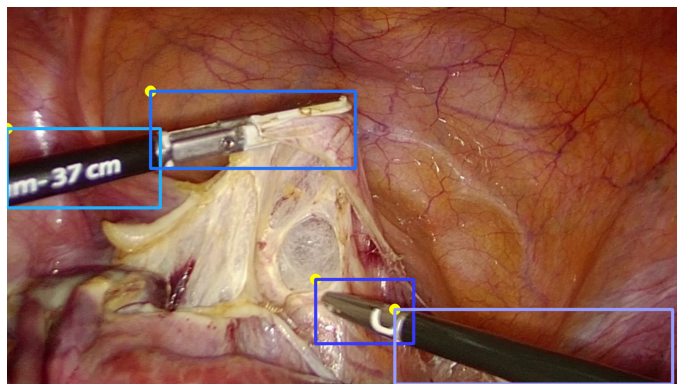

In [42]:
tools_name = ['tool1m', 'tool1s', 'tool2m', 'tool2s', 'tool3m', 'tool3s', 'tool4m', 'tool4s', 'tool5m', 'tool5s', 'tool6m', 'tool6s', 'tool7m', 'tool7s']
hex = ('FF3838', 'FF9D97', 'FF701F', 'FFB21D', 'CFD231', '48F90A', '92CC17', '3DDB86', '1A9334', '00D4BB',
       '2C99A8', '00C2FF', '344593', '6473FF', '0018EC', '8438FF', '520085', 'CB38FF', 'FF95C8', 'FF37C7')
palette = [hex2rgb('#' + c) for c in hex]
n = len(palette)

txt_path = '/home/curl/CUHK/Projects/oriented_object_detection/yolov5_obb_topleft/dataset/dataset_inhouse_phantom/train/labelTxt/'
img_path = txt_path.replace('labelTxt', 'images')
save_path = '/home/curl/CUHK/Projects/oriented_object_detection/yolov5_obb_topleft/debug/paper_img/'
ex_select_files = ['000050', '001081', '001100', '000982', '000845', '000728', '000689']
in_select_files = ['230704', '160505', '200206', '220506', '221303', '230704', '240705', '242405', '291006', '340106', '1030210', '7030203']

file_index = 0
# for file_index in range(len(ex_select_files)):
txt_file = txt_path + in_select_files[file_index] + '.txt'
img_file = img_path + in_select_files[file_index] + '.jpg'
labels_ = pd.read_table(txt_file, header=None, sep=' ')
labels=labels_.iloc[:, :8].values
img = cv2.imread(img_file)

labels = labels.astype(int)
rboxs = poly2rbox(polys=labels[:, :8], use_pi=True)
rpolys = rbox2poly(rboxs) # converted back
rpolys = rpolys.astype(int)
for ind in range(len(labels)):
# ind = 1
    box = labels[ind,:]
    hbbox = getMinRect(box.reshape((-1,2)))
    
    img = cv2.circle(img, center=(hbbox[0], hbbox[1]), radius=10, thickness=12, color=(0,255,255))
    color_index = tools_name.index(labels_.iloc[ind, -2])
    color = palette[color_index]
    img = cv2.line(img, (hbbox[0], hbbox[1]), (hbbox[2], hbbox[1]), color, 8)
    img = cv2.line(img, (hbbox[2], hbbox[1]), (hbbox[2], hbbox[3]), color, 8)
    img = cv2.line(img, (hbbox[2], hbbox[3]), (hbbox[0], hbbox[3]), color, 8)
    img = cv2.line(img, (hbbox[0], hbbox[3]), (hbbox[0], hbbox[1]), color, 8)

    
#     # test with the index, plot the converted poly infos
#     box = rpolys[ind,:]
# #     img = cv2.circle(img, center=(box[0], box[1]), radius=20, thickness=4, color=(255,0,255))
# #     img = cv2.line(img, (box[0], box[1]), (box[2], box[3]), (255,0,255), 2)
# #     img = cv2.line(img, (box[2], box[3]), (box[4], box[5]), (255,0,255), 2)
# #     img = cv2.line(img, (box[4], box[5]), (box[6], box[7]), (255,0,255), 2)
# #     img = cv2.line(img, (box[6], box[7]), (box[0], box[1]), (255,0,255), 2)

#     print('theta: ', rboxs[ind, -1]*180/np.pi)
#     box_array = box.reshape((-1,2))
#     dist = [np.linalg.norm(box_array[index%4, :] - labels[ind, :2]) + np.linalg.norm(box_array[(index+1)%4, :] - labels[ind, 2:4]) for index in range(4)]
#     topleft_index = np.argmin(dist)
#     # print('top left index: ', topleft_index)

#     # use simple rules to determine the first point from GT information
#     # rboxs[ind, -1]
#     # determine the real first point is in which point
#     order = topleft_index + 1 #

#     if rboxs[ind, -1] < 0:
#         # determine the direction according to the point order
#         if order == 1:
#             label = 0
#         if order == 2:
#             label = 1
#         if order == 3:
#             label = 2
#         if order == 4:
#             label = 3
#     if rboxs[ind, -1] >= 0:
#         # determine the direction according to the point order
#         if order == 2:
#             label = 0
#         if order == 3:
#             label = 1
#         if order == 4:
#             label = 2
#         if order == 1:
#             label = 3
    
#     print('label: ', label)
    
plt.figure(figsize=(12,8))
plt.imshow(img[:,:,::-1])
plt.axis('off')
save_img_path = save_path + ex_select_files[file_index] + '_hbb.jpg'
cv2.imwrite(save_img_path, img)
save_img_path

## process in a loop

In [163]:
# set 230704 as the example to demonstrate the point encoding + rotation bbox

In [44]:
import json

In [45]:
def readJson(jsonfile):
    with open(jsonfile,'r') as f:
        jsonData = json.load(f)
    return jsonData

In [46]:
json_path = '/home/curl/CUHK/Dataset/inhouse_segmentation/Dota/jsons/230704.json'
contentJson = readJson(json_path)

In [47]:
json_poly = '/home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/230704.json'
polyJson = readJson(json_poly)

In [48]:
img_path = '/home/curl/CUHK/Dataset/inhouse_segmentation/Dota/jsons/230704.jpg'
img = cv2.imread(img_path)

[ WARN:0@1179.198] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('/home/curl/CUHK/Dataset/inhouse_segmentation/Dota/jsons/230704.jpg'): can't open/read file: check file path/integrity


In [49]:
contentJson, 
polyJson

{'version': '4.5.6',
 'flags': {},
 'shapes': [{'label': 'tool2m',
   'points': [[411.4927536231884, 362.63768115942025],
    [965.1159420289854, 252.49275362318838],
    [983.9565217391304, 271.3333333333333],
    [988.3043478260869, 291.62318840579707],
    [810.0434782608695, 326.40579710144925],
    [730.3333333333333, 352.4927536231884],
    [733.231884057971, 368.4347826086956],
    [786.855072463768, 387.2753623188405],
    [439.0289855072463, 461.1884057971014]],
   'group_id': None,
   'shape_type': 'polygon',
   'flags': {}},
  {'label': 'tool2s',
   'points': [[410.0434782608695, 361.1884057971014],
    [439.0289855072463, 468.4347826086956],
    [0, 575],
    [0, 448]],
   'group_id': None,
   'shape_type': 'polygon',
   'flags': {}},
  {'label': 'tool1m',
   'points': [[1165.1159420289855, 871.3333333333333],
    [983.9565217391304, 822.0579710144926],
    [914.391304347826, 814.8115942028985],
    [902.7971014492753, 827.855072463768],
    [902.7971014492753, 845.24637681

In [50]:
contentJson['shapes']

[{'label': 'pt',
  'points': [[410.6969696969697, 346.9393939393939]],
  'group_id': None,
  'shape_type': 'point',
  'flags': {}},
 {'label': 'pt',
  'points': [[978.8787878787879, 242.39393939393938]],
  'group_id': None,
  'shape_type': 'point',
  'flags': {}},
 {'label': 'pt',
  'points': [[884.9393939393939, 872.6969696969697]],
  'group_id': None,
  'shape_type': 'point',
  'flags': {}},
 {'label': 'pt',
  'points': [[1110.6969696969697, 981.7878787878788]],
  'group_id': None,
  'shape_type': 'point',
  'flags': {}}]

In [51]:
index = 0
category_name = polyJson['shapes'][index]['label']
color_index = tools_name.index(category_name)
contour = np.array(polyJson['shapes'][index]['points'],np.int32)

In [52]:
contour

array([[411, 362],
       [965, 252],
       [983, 271],
       [988, 291],
       [810, 326],
       [730, 352],
       [733, 368],
       [786, 387],
       [439, 461]], dtype=int32)

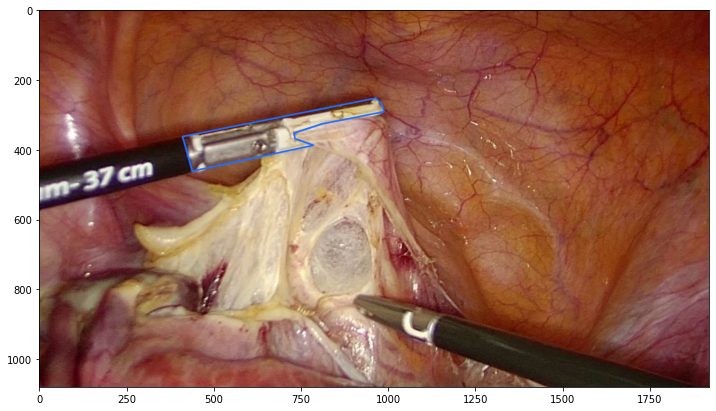

In [53]:
img = cv2.imread(img_file)
color = palette[color_index]
contour = contour.reshape((-1,1,2))
cv2.polylines(img, [contour], True, color, 4)
plt.figure(figsize=(12,8))
plt.imshow(img[:,:,::-1])

In [54]:
img = cv2.imread(img_file)
for poly in polyJson['shapes']:
    category_name = poly['label']
    color_index = tools_name.index(category_name)
    contour = np.array(poly['points'],np.int32)
    
    color = palette[color_index]
    contour = contour.reshape((-1,1,2))
    cv2.polylines(img, [contour], True, color, 4)

for pt in contentJson['shapes']:
    pt = np.array(pt['points'],np.int32)
    cv2.circle(img, center=(pt[0, 0], pt[0, 1]), radius=6, thickness=12, color=(0,255,255))

True

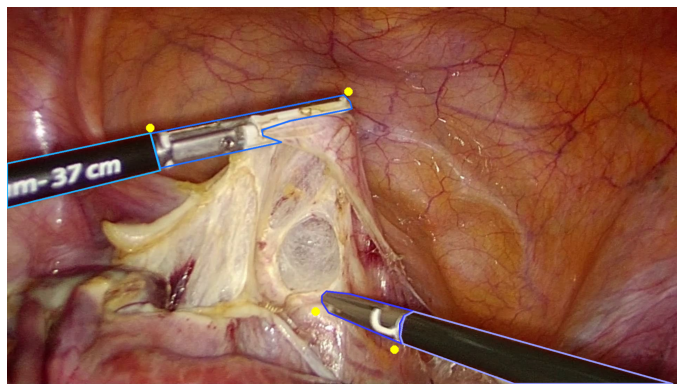

In [55]:
plt.figure(figsize=(12,8))
plt.imshow(img[:,:,::-1])
plt.axis('off')
save_img_path = save_path + 'raw_annotation_230704.jpg'
cv2.imwrite(save_img_path, img)

In [116]:
# calculate the IoU between the mask and the hbb and obb
import imutils
from shapely.geometry import Polygon
from shapely.validation import make_valid
# !pip install imutils

In [68]:
def poly_iou(poly1: Polygon, poly2: Polygon):
    intersection_area = poly1.intersection(poly2).area
    union_area = poly1.union(poly2).area
    return intersection_area / union_area
 
# a = Polygon([(0, 0), (0, 1), (1, 0)])
# b = Polygon([(0, 0), (1, 0), (1, 1)])

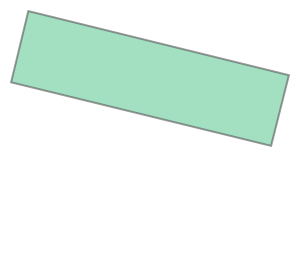

In [73]:
Polygon(np.array([[-29, 455],
 [409, 348],
 [439, 467],
 [  0, 575]]))

In [74]:
# img = cv2.imread(img_file)
for poly in polyJson['shapes']:
    category_name = poly['label']
    color_index = tools_name.index(category_name)
    contour = np.array(poly['points'],np.int32)
#     color = palette[color_index]
#     contour = contour.reshape((-1,1,2))
#     cv2.polylines(img, [contour], True, color, 4)
    # obb
    rect = cv2.minAreaRect(contour)
    obb = cv2.cv.Boxpoints() if imutils.is_cv2() else cv2.boxPoints(rect)
    obb = np.int0(obb)
    # hbb
    rect = getMinRect(contour)
    hbb = np.array([[rect[0], rect[1]],
                   [rect[2], rect[1]],
                   [rect[2], rect[3]],
                   [rect[0], rect[3]]])
    
    poly_contour = Polygon(contour)
    poly_hbb = Polygon(hbb)
    poly_obb = Polygon(obb)
    
    hbb_iou = poly_iou(poly_contour, poly_hbb)
    obb_iou = poly_iou(poly_contour, poly_obb)
    print('hbb: ', hbb_iou, 'obb: ', obb_iou)

hbb:  0.3599338270048842 obb:  0.7278955548959737
hbb:  0.5436420922657696 obb:  0.9114962466077746
hbb:  0.4734854245880862 obb:  0.7166314981776328
hbb:  0.4013377926421405 obb:  0.672858918013291


In [ ]:
# img = cv2.line(img, (hbbox[0], hbbox[1]), (hbbox[2], hbbox[1]), color, 8)
# img = cv2.line(img, (hbbox[2], hbbox[1]), (hbbox[2], hbbox[3]), color, 8)
# img = cv2.line(img, (hbbox[2], hbbox[3]), (hbbox[0], hbbox[3]), color, 8)
# img = cv2.line(img, (hbbox[0], hbbox[3]), (hbbox[0], hbbox[1]), color, 8)

In [75]:
json_paths = sorted(glob.glob('/home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/*.json'))
json_paths.extend(sorted(glob.glob('/home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/*.json')))

In [77]:
len(json_paths)

3385

In [115]:
index = 13
json_path = json_paths[index]

tool1m_hbb_iou, tool1m_obb_iou = [], []
tool2m_hbb_iou, tool2m_obb_iou = [], []
tool3m_hbb_iou, tool3m_obb_iou = [], []
tool4m_hbb_iou, tool4m_obb_iou = [], []
tool5m_hbb_iou, tool5m_obb_iou = [], []

tool1s_hbb_iou, tool1s_obb_iou = [], []
tool2s_hbb_iou, tool2s_obb_iou = [], []
tool3s_hbb_iou, tool3s_obb_iou = [], []
tool4s_hbb_iou, tool4s_obb_iou = [], []
tool5s_hbb_iou, tool5s_obb_iou = [], []

sorted_json_paths = sorted(json_paths)
for i, json_path in enumerate(sorted_json_paths):
# for i, json_path in enumerate(sorted_json_paths[234:]):
    print('json_path: ', i, json_path)
    polyJson = readJson(json_path)

    for poly in polyJson['shapes']:
        category_name = poly['label']
        if category_name == 'uterus':
            continue
        color_index = tools_name.index(category_name)
        contour = np.array(poly['points'],np.int32)
    #     color = palette[color_index]
    #     contour = contour.reshape((-1,1,2))
    #     cv2.polylines(img, [contour], True, color, 4)
        # obb
        rect = cv2.minAreaRect(contour)
        obb = cv2.cv.Boxpoints() if imutils.is_cv2() else cv2.boxPoints(rect)
        obb = np.int0(obb)
        # hbb
        rect = getMinRect(contour)
        hbb = np.array([[rect[0], rect[1]],
                       [rect[2], rect[1]],
                       [rect[2], rect[3]],
                       [rect[0], rect[3]]])

        poly_contour = Polygon(contour)
        poly_contour = make_valid(poly_contour)
        poly_hbb = Polygon(hbb)
        poly_obb = Polygon(obb)

        hbb_iou = poly_iou(poly_contour, poly_hbb)
        obb_iou = poly_iou(poly_contour, poly_obb)

        if category_name == 'tool1m':
            tool1m_hbb_iou.append(hbb_iou)
            tool1m_obb_iou.append(obb_iou)
        elif category_name == 'tool1s':
            tool1s_hbb_iou.append(hbb_iou)
            tool1s_obb_iou.append(obb_iou)
        elif category_name == 'tool2m':
            tool2m_hbb_iou.append(hbb_iou)
            tool2m_obb_iou.append(obb_iou)
        elif category_name == 'tool2s':
            tool2s_hbb_iou.append(hbb_iou)
            tool2s_obb_iou.append(obb_iou)
        elif category_name == 'tool3m':
            tool3m_hbb_iou.append(hbb_iou)
            tool3m_obb_iou.append(obb_iou)
        elif category_name == 'tool3s':
            tool3s_hbb_iou.append(hbb_iou)
            tool3s_obb_iou.append(obb_iou)
        elif category_name == 'tool4m' or category_name == 'tool7m':
            tool4m_hbb_iou.append(hbb_iou)
            tool4m_obb_iou.append(obb_iou)
        elif category_name == 'tool4s' or category_name == 'tool7s':
            tool4s_hbb_iou.append(hbb_iou)
            tool4s_obb_iou.append(obb_iou)
        elif category_name == 'tool5m':
            tool5m_hbb_iou.append(hbb_iou)
            tool5m_obb_iou.append(obb_iou)
        elif category_name == 'tool5s':
            tool5s_hbb_iou.append(hbb_iou)
            tool5s_obb_iou.append(obb_iou)

    #     print('hbb: ', hbb_iou, 'obb: ', obb_iou)

json_path:  0 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/220101.json
json_path:  1 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/220102.json
json_path:  2 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/220103.json
json_path:  3 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/220104.json
json_path:  4 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/220105.json
json_path:  5 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/220106.json
json_path:  6 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/220201.json
json_path:  7 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/220202.json
json_path:  8 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/220203.json
json_path:  9 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/220204.json
json_path:  10 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentati

json_path:  196 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/223306.json
json_path:  197 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/223401.json
json_path:  198 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/223402.json
json_path:  199 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/223403.json
json_path:  200 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/223404.json
json_path:  201 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/223405.json
json_path:  202 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/223406.json
json_path:  203 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/223501.json
json_path:  204 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/223502.json
json_path:  205 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/223503.json
json_path:  206 /home/curl/CUHK/Dataset/inhouse_se

json_path:  323 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/231801.json
json_path:  324 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/231802.json
json_path:  325 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/231803.json
json_path:  326 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/231804.json
json_path:  327 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/231805.json
json_path:  328 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/231806.json
json_path:  329 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/231901.json
json_path:  330 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/231902.json
json_path:  331 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/231903.json
json_path:  332 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/231904.json
json_path:  333 /home/curl/CUHK/Dataset/inhouse_se

json_path:  445 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/241703.json
json_path:  446 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/241704.json
json_path:  447 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/241705.json
json_path:  448 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/241706.json
json_path:  449 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/241801.json
json_path:  450 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/241802.json
json_path:  451 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/241803.json
json_path:  452 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/241804.json
json_path:  453 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/241805.json
json_path:  454 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/241806.json
json_path:  455 /home/curl/CUHK/Dataset/inhouse_se

json_path:  545 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/250701.json
json_path:  546 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/250702.json
json_path:  547 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/250703.json
json_path:  548 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/250704.json
json_path:  549 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/250705.json
json_path:  550 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/250706.json
json_path:  551 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/250801.json
json_path:  552 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/250802.json
json_path:  553 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/250803.json
json_path:  554 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/250804.json
json_path:  555 /home/curl/CUHK/Dataset/inhouse_se

json_path:  664 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/260706.json
json_path:  665 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/260801.json
json_path:  666 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/260802.json
json_path:  667 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/260803.json
json_path:  668 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/260804.json
json_path:  669 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/260805.json
json_path:  670 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/260806.json
json_path:  671 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/260901.json
json_path:  672 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/260902.json
json_path:  673 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/260903.json
json_path:  674 /home/curl/CUHK/Dataset/inhouse_se

json_path:  790 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/271802.json
json_path:  791 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/271803.json
json_path:  792 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/271804.json
json_path:  793 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/271805.json
json_path:  794 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/271806.json
json_path:  795 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/271901.json
json_path:  796 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/271902.json
json_path:  797 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/271903.json
json_path:  798 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/271904.json
json_path:  799 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/271905.json
json_path:  800 /home/curl/CUHK/Dataset/inhouse_se

json_path:  939 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/291301.json
json_path:  940 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/291302.json
json_path:  941 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/291303.json
json_path:  942 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/291304.json
json_path:  943 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/291305.json
json_path:  944 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/291306.json
json_path:  945 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/291401.json
json_path:  946 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/291402.json
json_path:  947 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/291403.json
json_path:  948 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/291404.json
json_path:  949 /home/curl/CUHK/Dataset/inhouse_se

json_path:  1076 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/321006.json
json_path:  1077 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/321101.json
json_path:  1078 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/321102.json
json_path:  1079 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/321103.json
json_path:  1080 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/321104.json
json_path:  1081 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/321105.json
json_path:  1082 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/321106.json
json_path:  1083 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/321201.json
json_path:  1084 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/321202.json
json_path:  1085 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/321203.json
json_path:  1086 /home/curl/CUHK/Dataset

json_path:  1223 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/341603.json
json_path:  1224 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/341604.json
json_path:  1225 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/341605.json
json_path:  1226 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/341701.json
json_path:  1227 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/341702.json
json_path:  1228 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/341703.json
json_path:  1229 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/341704.json
json_path:  1230 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/341705.json
json_path:  1231 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/341801.json
json_path:  1232 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/341802.json
json_path:  1233 /home/curl/CUHK/Dataset

json_path:  1372 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/380305.json
json_path:  1373 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/380306.json
json_path:  1374 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/380401.json
json_path:  1375 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/380402.json
json_path:  1376 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/380403.json
json_path:  1377 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/380404.json
json_path:  1378 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/380405.json
json_path:  1379 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/380406.json
json_path:  1380 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/380501.json
json_path:  1381 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/380502.json
json_path:  1382 /home/curl/CUHK/Dataset

json_path:  1525 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/391504.json
json_path:  1526 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/391505.json
json_path:  1527 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/391506.json
json_path:  1528 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/391601.json
json_path:  1529 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/391602.json
json_path:  1530 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/391603.json
json_path:  1531 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/391604.json
json_path:  1532 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/391605.json
json_path:  1533 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/391606.json
json_path:  1534 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/391701.json
json_path:  1535 /home/curl/CUHK/Dataset

json_path:  1680 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/420204.json
json_path:  1681 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/420205.json
json_path:  1682 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/420206.json
json_path:  1683 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/420301.json
json_path:  1684 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/420302.json
json_path:  1685 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/420303.json
json_path:  1686 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/420304.json
json_path:  1687 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/420305.json
json_path:  1688 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/420306.json
json_path:  1689 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_all/420401.json
json_path:  1690 /home/curl/CUHK/Dataset

json_path:  1813 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/1010301.json
json_path:  1814 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/1010302.json
json_path:  1815 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/1010303.json
json_path:  1816 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/1010304.json
json_path:  1817 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/1010305.json
json_path:  1818 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/1010306.json
json_path:  1819 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/1010307.json
json_path:  1820 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/1010308.json
json_path:  1821 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/1010309.json
json_path:  1822 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/1010310.json
json_path:

json_path:  1896 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/1020507.json
json_path:  1897 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/1020508.json
json_path:  1898 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/1020509.json
json_path:  1899 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/1020510.json
json_path:  1900 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/1020511.json
json_path:  1901 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/1020601.json
json_path:  1902 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/1020602.json
json_path:  1903 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/1020603.json
json_path:  1904 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/1020604.json
json_path:  1905 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/1020605.json
json_path:

json_path:  2024 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/1030703.json
json_path:  2025 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/1030704.json
json_path:  2026 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/1030705.json
json_path:  2027 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/1030706.json
json_path:  2028 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/1030707.json
json_path:  2029 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/1030708.json
json_path:  2030 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/1030709.json
json_path:  2031 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/1030710.json
json_path:  2032 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/1030711.json
json_path:  2033 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/1030801.json
json_path:

json_path:  2149 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/1050307.json
json_path:  2150 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/1050308.json
json_path:  2151 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/1050309.json
json_path:  2152 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/1050310.json
json_path:  2153 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/1050311.json
json_path:  2154 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/1050401.json
json_path:  2155 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/1050402.json
json_path:  2156 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/1050403.json
json_path:  2157 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/1050404.json
json_path:  2158 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/1050405.json
json_path:

json_path:  2272 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/1060409.json
json_path:  2273 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/1060410.json
json_path:  2274 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/1060411.json
json_path:  2275 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/1060501.json
json_path:  2276 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/1060502.json
json_path:  2277 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/1060503.json
json_path:  2278 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/1060504.json
json_path:  2279 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/1060505.json
json_path:  2280 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/1060506.json
json_path:  2281 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/1060507.json
json_path:

json_path:  2360 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/120303.json
json_path:  2361 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/120304.json
json_path:  2362 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/120305.json
json_path:  2363 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/120306.json
json_path:  2364 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/120307.json
json_path:  2365 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/120308.json
json_path:  2366 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/120309.json
json_path:  2367 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/120401.json
json_path:  2368 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/120402.json
json_path:  2369 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/120403.json
json_path:  2370 /ho

json_path:  2445 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/130606.json
json_path:  2446 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/130607.json
json_path:  2447 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/130608.json
json_path:  2448 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/130609.json
json_path:  2449 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/130610.json
json_path:  2450 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/140101.json
json_path:  2451 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/140102.json
json_path:  2452 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/140103.json
json_path:  2453 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/140104.json
json_path:  2454 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/140105.json
json_path:  2455 /ho

json_path:  2563 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/150704.json
json_path:  2564 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/150705.json
json_path:  2565 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/150706.json
json_path:  2566 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/150707.json
json_path:  2567 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/150708.json
json_path:  2568 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/150709.json
json_path:  2569 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/150710.json
json_path:  2570 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/150711.json
json_path:  2571 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/150712.json
json_path:  2572 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/150713.json
json_path:  2573 /ho

json_path:  2677 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/170905.json
json_path:  2678 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/170906.json
json_path:  2679 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/170907.json
json_path:  2680 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/170908.json
json_path:  2681 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/190301.json
json_path:  2682 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/190302.json
json_path:  2683 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/190303.json
json_path:  2684 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/190304.json
json_path:  2685 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/190305.json
json_path:  2686 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/190306.json
json_path:  2687 /ho

json_path:  2765 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/5170106.json
json_path:  2766 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/5170107.json
json_path:  2767 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/5170108.json
json_path:  2768 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/5170109.json
json_path:  2769 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/5170110.json
json_path:  2770 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/5170111.json
json_path:  2771 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/5170201.json
json_path:  2772 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/5170202.json
json_path:  2773 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/5170203.json
json_path:  2774 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/5170204.json
json_path:

json_path:  2887 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/5180207.json
json_path:  2888 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/5180208.json
json_path:  2889 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/5180209.json
json_path:  2890 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/5180210.json
json_path:  2891 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/5180211.json
json_path:  2892 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/5180301.json
json_path:  2893 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/5180302.json
json_path:  2894 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/5180303.json
json_path:  2895 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/5180304.json
json_path:  2896 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/5180305.json
json_path:

json_path:  2997 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/5190707.json
json_path:  2998 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/5190708.json
json_path:  2999 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/5190709.json
json_path:  3000 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/5190710.json
json_path:  3001 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/5190711.json
json_path:  3002 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/5190801.json
json_path:  3003 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/5190802.json
json_path:  3004 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/5190803.json
json_path:  3005 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/5190804.json
json_path:  3006 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/5190805.json
json_path:

json_path:  3102 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/5200702.json
json_path:  3103 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/5200703.json
json_path:  3104 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/5200704.json
json_path:  3105 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/5200705.json
json_path:  3106 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/5200706.json
json_path:  3107 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/5200707.json
json_path:  3108 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/5200708.json
json_path:  3109 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/5200709.json
json_path:  3110 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/5200710.json
json_path:  3111 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/5200711.json
json_path:

json_path:  3231 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/7010132.json
json_path:  3232 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/7010133.json
json_path:  3233 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/7010134.json
json_path:  3234 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/7010135.json
json_path:  3235 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/7010201.json
json_path:  3236 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/7010202.json
json_path:  3237 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/7010203.json
json_path:  3238 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/7010204.json
json_path:  3239 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/7010205.json
json_path:  3240 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/7010206.json
json_path:

json_path:  3362 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/7030211.json
json_path:  3363 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/7030212.json
json_path:  3364 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/7030213.json
json_path:  3365 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/7030214.json
json_path:  3366 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/7030215.json
json_path:  3367 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/7030216.json
json_path:  3368 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/7030217.json
json_path:  3369 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/7030218.json
json_path:  3370 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/7030219.json
json_path:  3371 /home/curl/CUHK/Dataset/inhouse_segmentation/segmentation/json_zhang/7030301.json
json_path:

In [114]:
hbb, contour, poly_iou(poly_contour, poly_obb)

(array([[1401,  262],
        [1919,  262],
        [1919,  731],
        [1401,  731]], dtype=int32),
 array([[1913,  399],
        [1709,  376],
        [1591,  338],
        [1575,  288],
        [1590,  268],
        [1919,  262],
        [1918,  490],
        [1919,  524],
        [1919,  600],
        [1479,  729],
        [1428,  731],
        [1407,  707],
        [1401,  651],
        [1412,  625],
        [1675,  504],
        [1856,  415],
        [1909,  459],
        [1919,  454]], dtype=int32),
 0.49587093617830325)

In [117]:
tool1m_hbb_iou, tool1m_obb_iou, tool2m_hbb_iou, tool2m_obb_iou, tool3m_hbb_iou, tool3m_obb_iou, tool4m_hbb_iou, tool4m_obb_iou, tool5m_hbb_iou, tool5m_obb_iou

([0.6625393697849029,
  0.7226291089895724,
  0.5508589279977032,
  0.540426967469769,
  0.5429313502259545,
  0.5453937228527392,
  0.5674797893237543,
  0.7374328910048622,
  0.6841833966359196,
  0.7337191358024692,
  0.5944470111136778,
  0.6707104641035212,
  0.7116231399939265,
  0.4959446626113293,
  0.2145413938689347,
  0.3114593579540374,
  0.524410107413277,
  0.6295220810647308,
  0.540054148749801,
  0.36972953115672497,
  0.39739345551059857,
  0.40417321863534056,
  0.5701475155279503,
  0.19743130227001196,
  0.1424778761061947,
  0.3969788818238724,
  0.4823394823394823,
  0.43332094636442464,
  0.3611862235821533,
  0.2396445303785231,
  0.3712121212121212,
  0.4419850414392561,
  0.4142192082111437,
  0.6674476116100482,
  0.7423152533285676,
  0.6916191837264982,
  0.7183575342757841,
  0.7145439437106104,
  0.6930786604699648,
  0.5038484848484849,
  0.6913223847403986,
  0.5946593249171814,
  0.8254839500122519,
  0.7099914965986395,
  0.5770629127563434,
  0.6322

In [118]:
tool1s_hbb_iou, tool1s_obb_iou, tool2s_hbb_iou, tool2s_obb_iou, tool3s_hbb_iou, tool3s_obb_iou, tool4s_hbb_iou, tool4s_obb_iou, tool5s_hbb_iou, tool5s_obb_iou

([0.9018584738135201,
  0.9619913616731075,
  0.9055856857413278,
  0.9659597326118097,
  0.9416105358399517,
  0.9147772342675833,
  0.837179340575567,
  0.9822607509080328,
  0.9528672730075536,
  0.9102803738317757,
  0.9754053035063466,
  0.9689995796553174,
  0.88796768707483,
  0.7243530873534655,
  0.9152556390977443,
  0.8707210034893651,
  0.7256950328854457,
  0.8943805335557913,
  0.7197634584013051,
  0.5357464736733519,
  0.31211989144000474,
  0.18797444481116507,
  0.28873181758616173,
  0.43286047415468326,
  0.42930984274898076,
  0.4014704530833563,
  0.3101169564637346,
  0.2942862666040706,
  0.30194503171247355,
  0.38594665823318575,
  0.47313158712667064,
  0.30942690459849004,
  0.8459470636889992,
  0.9596714243235207,
  0.9335122972732133,
  0.9507141367806505,
  0.9462168978562421,
  0.9657933356353591,
  0.6903200999711622,
  0.7936112034881573,
  0.6078807556080283,
  0.8914204789903916,
  0.9180694403606783,
  0.8915051771634843,
  0.8967472416182506,
  0.

In [120]:
tool1m_hbb_iou_array = np.array(tool1m_hbb_iou)
tool2m_hbb_iou_array = np.array(tool2m_hbb_iou)
tool3m_hbb_iou_array = np.array(tool3m_hbb_iou)
tool4m_hbb_iou_array = np.array(tool4m_hbb_iou)
tool5m_hbb_iou_array = np.array(tool5m_hbb_iou)

tool1m_obb_iou_array = np.array(tool1m_obb_iou)
tool2m_obb_iou_array = np.array(tool2m_obb_iou)
tool3m_obb_iou_array = np.array(tool3m_obb_iou)
tool4m_obb_iou_array = np.array(tool4m_obb_iou)
tool5m_obb_iou_array = np.array(tool5m_obb_iou)

In [121]:
tool1s_hbb_iou_array = np.array(tool1s_hbb_iou)
tool2s_hbb_iou_array = np.array(tool2s_hbb_iou)
tool3s_hbb_iou_array = np.array(tool3s_hbb_iou)
tool4s_hbb_iou_array = np.array(tool4s_hbb_iou)
tool5s_hbb_iou_array = np.array(tool5s_hbb_iou)

tool1s_obb_iou_array = np.array(tool1s_obb_iou)
tool2s_obb_iou_array = np.array(tool2s_obb_iou)
tool3s_obb_iou_array = np.array(tool3s_obb_iou)
tool4s_obb_iou_array = np.array(tool4s_obb_iou)
tool5s_obb_iou_array = np.array(tool5s_obb_iou)

In [123]:
tool1m_hbb_iou_array.mean(), tool2m_hbb_iou_array.mean(), tool3m_hbb_iou_array.mean(), tool4m_hbb_iou_array.mean(), tool5m_hbb_iou_array.mean()

(0.5455758312310506,
 0.5237924099089449,
 0.5694458073645419,
 0.4447002103716209,
 0.5093718228011561)

In [124]:
tool1m_obb_iou_array.mean(), tool2m_obb_iou_array.mean(), tool3m_obb_iou_array.mean(), tool4m_obb_iou_array.mean(), tool5m_obb_iou_array.mean()

(0.6601169465153073,
 0.6470177471320901,
 0.6659343421687073,
 0.5427487988536276,
 0.6013664933228788)

In [125]:
tool1s_hbb_iou_array.mean(), tool2s_hbb_iou_array.mean(), tool3s_hbb_iou_array.mean(), tool4s_hbb_iou_array.mean(), tool5s_hbb_iou_array.mean()

(0.635127538089169,
 0.6722911886420713,
 0.6307059728973259,
 0.5933090569277528,
 0.6662313962766515)

In [126]:
tool1s_obb_iou_array.mean(), tool2s_obb_iou_array.mean(), tool3s_obb_iou_array.mean(), tool4s_obb_iou_array.mean(), tool5s_obb_iou_array.mean()

(0.770936437222347,
 0.7704871623432201,
 0.7632514439980866,
 0.7491407447384717,
 0.7632275362056734)

In [129]:
main_hbb_iou_array = np.hstack((tool1m_hbb_iou_array,tool2m_hbb_iou_array, tool3m_hbb_iou_array, tool4m_hbb_iou_array, tool5m_hbb_iou_array))

In [130]:
main_hbb_iou_array.shape, main_hbb_iou_array.mean()

((5149,), 0.529733891464169)

In [131]:
main_obb_iou_array = np.hstack((tool1m_obb_iou_array,tool2m_obb_iou_array, tool3m_obb_iou_array, tool4m_obb_iou_array, tool5m_obb_iou_array))

In [132]:
main_obb_iou_array.shape, main_obb_iou_array.mean()

((5149,), 0.6387117525544784)

In [133]:
shaft_hbb_iou_array = np.hstack((tool1s_hbb_iou_array,tool2s_hbb_iou_array, tool3s_hbb_iou_array, tool4s_hbb_iou_array, tool5s_hbb_iou_array))

In [134]:
shaft_hbb_iou_array.shape, shaft_hbb_iou_array.mean()

((4042,), 0.6459617599630878)

In [135]:
shaft_obb_iou_array = np.hstack((tool1s_obb_iou_array,tool2s_obb_iou_array, tool3s_obb_iou_array, tool4s_obb_iou_array, tool5s_obb_iou_array))

In [136]:
shaft_obb_iou_array.shape, shaft_obb_iou_array.mean()

((4042,), 0.7656479994781732)